Курс «Теория вероятностей и статистика в Машинном Обучении»

Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины

⦁	Найти на сайте РосСтат 	https://rosstat.gov.ru/statistic непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.

⦁	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:

-	мат.ожидание (*)
-	2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
-	квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 
-	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [11]:
# В качестве датасета выбран набор данных о медицинских расходах
# https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')

In [12]:
# bmi - индекс массы тела (body mass index)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# Математическое ожидание
mean_bmi = df['bmi'].mean()

# Дисперсия
var_bmi = df['bmi'].var()

# Асимметрия
skewness_bmi = df['bmi'].skew()

# Эксцесс (мера остроты или "плоскости" распределения)
kurtosis_bmi = df['bmi'].kurtosis()

print(f"Мат. ожидание (mean): {mean_bmi}")
print(f"Дисперсия (variance): {var_bmi}")
print(f"Асимметрия (skewness): {skewness_bmi}")
print(f"Эксцесс (kurtosis): {kurtosis_bmi}")

Мат. ожидание (mean): 30.66339686098655
Дисперсия (variance): 37.18788360977323
Асимметрия (skewness): 0.2840471105987448
Эксцесс (kurtosis): -0.05073153135467834


In [17]:
quantile_05 = df['bmi'].quantile(0.05)
quantile_95 = df['bmi'].quantile(0.95)
quantile_025 = df['bmi'].quantile(0.025)

print(f"Квантиль уровня 0.05: {quantile_05}")
print(f"Квантиль уровня 0.95: {quantile_95}")
print(f"2.5%-ная точка: {quantile_025}")

Квантиль уровня 0.05: 21.256000000000004
Квантиль уровня 0.95: 41.105999999999995
2.5%-ная точка: 19.855


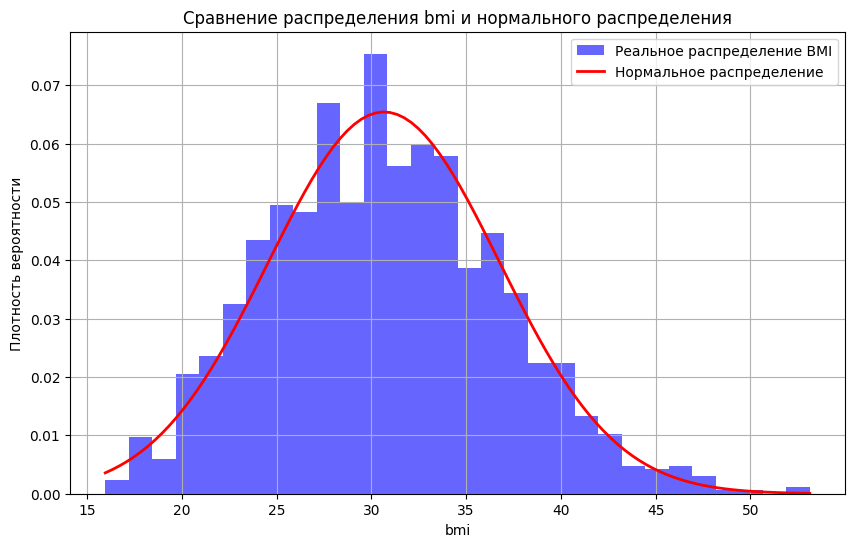

In [25]:
# Настраиваем нормальное распределение с параметрами mean и var
x_values = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)
normal_dist = stats.norm.pdf(x_values, mean_bmi, np.sqrt(var_bmi))

# Построение гистограммы и теоретической кривой нормального распределения
plt.figure(figsize=(10, 6))

# Гистограмма реального распределения BMI
plt.hist(df['bmi'], bins=30, density=True, alpha=0.6, color='blue', label='Реальное распределение BMI')

# Кривая нормального распределения
plt.plot(x_values, normal_dist, 'r', linewidth=2, label='Нормальное распределение')

plt.title('Сравнение распределения bmi и нормального распределения')
plt.xlabel('bmi')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()